In [1]:
import os
import glob
import datetime
import statistics
import numpy as np
import pandas as pd
import import_ipynb
from marcap import marcap_data
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [2]:
#from qp import get_stocks # 1/PBR + GP/A
#from ncav import get_stocks # NCAV
from super_value import get_stocks
#from super_quality import get_stocks

importing Jupyter notebook from super_value.ipynb
importing Jupyter notebook from common.ipynb


In [46]:
MODEL_NAME = 'super-quality'
DATA_DIR = 'data/daily/12-1'

In [47]:
df_account = pd.DataFrame(columns=['start_date', 'end_date', 'filepath'])
filepaths = glob.glob(DATA_DIR + "/*.csv")
filepaths = sorted(filepaths)

days = []
for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date =  os.path.basename(filepaths[i])[:-4]
        end_date =  os.path.basename(filepaths[i + 1])[:-4]
        
        day = {'start_date':start_date, 'end_date':end_date, 'filepath':filepaths[i]}
        days.append(day)

df_account = df_account.append(days)

In [48]:
df_account

,start_date,end_date,filepath
0,2002-12-02,2003-12-01,data/daily/12-1/2002-12-02.csv
1,2003-12-01,2004-12-01,data/daily/12-1/2003-12-01.csv
2,2004-12-01,2005-12-01,data/daily/12-1/2004-12-01.csv
3,2005-12-01,2006-12-01,data/daily/12-1/2005-12-01.csv
4,2006-12-01,2007-12-03,data/daily/12-1/2006-12-01.csv
5,2007-12-03,2008-12-01,data/daily/12-1/2007-12-03.csv
6,2008-12-01,2009-12-01,data/daily/12-1/2008-12-01.csv
7,2009-12-01,2010-12-01,data/daily/12-1/2009-12-01.csv
8,2010-12-01,2011-12-01,data/daily/12-1/2010-12-01.csv
9,2011-12-01,2012-12-03,data/daily/12-1/2011-12-01.csv


In [49]:
# 연도별 종목을 구한다.
df_account['stocks'] = df_account.apply(lambda x: get_stocks(x.filepath, x.start_date), axis=1)

------------------------------
2002-12-02 data/daily/12-1/2002-12-02.csv
전체 1576
지주사, 금융사 제외 1477


common.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "\n",


국외주식 제외 1477
유동비율 > 1 972
가격정보 없는 기업 제외 702
선정 기업 수 30
------------------------------
2003-12-01 data/daily/12-1/2003-12-01.csv
전체 1668
지주사, 금융사 제외 1569
국외주식 제외 1569
유동비율 > 1 1002
가격정보 없는 기업 제외 731
선정 기업 수 30
------------------------------
2004-12-01 data/daily/12-1/2004-12-01.csv
전체 1716
지주사, 금융사 제외 1614
국외주식 제외 1614
유동비율 > 1 1034
가격정보 없는 기업 제외 759
선정 기업 수 30
------------------------------
2005-12-01 data/daily/12-1/2005-12-01.csv
전체 1812
지주사, 금융사 제외 1708
국외주식 제외 1707
유동비율 > 1 1123
가격정보 없는 기업 제외 820
선정 기업 수 30
------------------------------
2006-12-01 data/daily/12-1/2006-12-01.csv
전체 1861
지주사, 금융사 제외 1754
국외주식 제외 1752
유동비율 > 1 1207
가격정보 없는 기업 제외 899
선정 기업 수 30
------------------------------
2007-12-03 data/daily/12-1/2007-12-03.csv
전체 1952
지주사, 금융사 제외 1841
국외주식 제외 1835
유동비율 > 1 1261
가격정보 없는 기업 제외 969
선정 기업 수 30
------------------------------
2008-12-01 data/daily/12-1/2008-12-01.csv
전체 2046
지주사, 금융사 제외 1930
국외주식 제외 1920
유동비율 > 1 1279
가격정보 없는 기업 제외 986
선정 기업 수 30
---------------------

In [50]:
# 연도별 수익률을 구한다.
df_account['yield'] = 0.0
df_account['yields'] = 0.0
df_account['yields'] = df_account['yields'].astype('object')

for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date = df_account.iloc[i].start_date
        end_date = df_account.iloc[i].end_date
        
        df_this_year = pd.read_csv(filepaths[i], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        df_next_year = pd.read_csv(filepaths[i + 1], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        
        stocks = df_account.iloc[i].stocks   
        yields = []
        
        # 종목별 수익률을 구한다.
        for stock in stocks:
            start_price = df_this_year[df_this_year['종목코드'] == stock]['주가'].iloc[0]
            end_price = df_next_year[df_next_year['종목코드'] == stock]['주가']
            
            if len(end_price) == 0:
                end_price = 0
            else:                    
                end_price = end_price.fillna(0) # 가격 정보가 없을 경우 상폐
                end_price = end_price.iloc[0]
            
            # get yield
            yields.append(end_price / start_price)

        # stock 수익률들의 avg가 total 수익률이 된다. (동일 비중이기 때문에)
        mean_yields = statistics.mean(yields)
        df_account.at[i, 'yield'] = mean_yields
        df_account.at[i, 'yields'] = yields
        
        print(start_date, '~', end_date, ":", mean_yields)
        
        #break

2002-12-02 ~ 2003-12-01 : 1.0961847680811476
2003-12-01 ~ 2004-12-01 : 1.0517679786342065
2004-12-01 ~ 2005-12-01 : 2.945726176097978
2005-12-01 ~ 2006-12-01 : 1.183353164812978
2006-12-01 ~ 2007-12-03 : 1.7615015887770586
2007-12-03 ~ 2008-12-01 : 0.6284619323430755
2008-12-01 ~ 2009-12-01 : 2.1719306603272606
2009-12-01 ~ 2010-12-01 : 1.424910125367603
2010-12-01 ~ 2011-12-01 : 1.2138776438943542
2011-12-01 ~ 2012-12-03 : 1.6289949897100569
2012-12-03 ~ 2013-12-02 : 1.1847925746688168
2013-12-02 ~ 2014-12-01 : 1.0689122129086959
2014-12-01 ~ 2015-12-01 : 1.7451288555269286
2015-12-01 ~ 2016-12-01 : 1.40984176217506
2016-12-01 ~ 2017-12-01 : 1.4106883760929736
2017-12-01 ~ 2018-12-03 : 1.193567862912756
2018-12-03 ~ 2019-12-02 : 1.0105385764255392


In [51]:
df_account['total'] = df_account['yield'].cumprod()

In [52]:
df_account['cagr'] = 0.0
for i, row in enumerate(df_account.iterrows()):
    df_account.at[i, 'cagr'] = pow(row[1]['total'], 1/(i+1))

In [53]:
def get_win_rate(yield_rates):
    return sum([yield_rate > 1.0 for yield_rate in yield_rates]) / len(yield_rates)

df_account['win_rate'] = df_account.apply(lambda x: get_win_rate(x['yields']), axis=1)

In [54]:
df_account['best_corp'] = df_account.apply(lambda x: max(x['yields']), axis=1)
df_account['worst_corp'] = df_account.apply(lambda x: min(x['yields']), axis=1)

In [55]:
df_account['best_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmax(x['yields'])], axis=1)
df_account['worst_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmin(x['yields'])], axis=1)

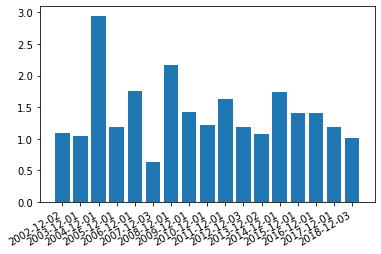

In [56]:
fig, ax = plt.subplots()
plt.bar(df_account['start_date'], df_account['yield'])
fig.autofmt_xdate()
plt.show()

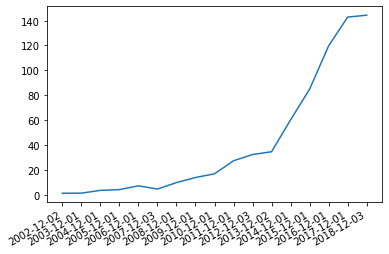

In [57]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['total'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

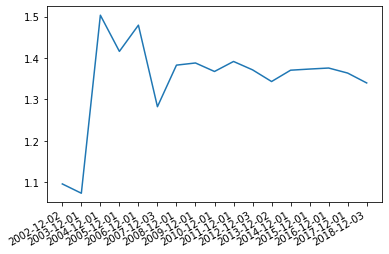

In [58]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['cagr'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

In [59]:
1 - min(df_account['yield'])

0.37153806765692454

In [60]:
df_account

,start_date,end_date,filepath,stocks,yield,yields,total,cagr,win_rate,best_corp,worst_corp,best_stock_code,worst_stock_code
0,2002-12-02,2003-12-01,data/daily/12-1/2002-12-02.csv,"[022220, 021820, 000850, 013360, 009780, 03801...",1.096185,"[0.0, 1.0375647668393781, 0.9224924012158054, ...",1.096185,1.096185,0.233333,5.926471,0.000000,027040,022220
1,2003-12-01,2004-12-01,data/daily/12-1/2003-12-01.csv,"[021820, 002360, 002290, 007110, 017650, 02527...",1.051768,"[1.0986267166042447, 1.0127659574468084, 0.926...",1.152932,1.073747,0.566667,2.305882,0.000000,012340,007110
2,2004-12-01,2005-12-01,data/daily/12-1/2004-12-01.csv,"[021820, 004780, 024740, 029480, 001840, 00229...",2.945726,"[5.7272727272727275, 2.205357142857143, 3.5625...",3.396222,1.503137,0.933333,7.148148,0.412500,024830,003310
3,2005-12-01,2006-12-01,data/daily/12-1/2005-12-01.csv,"[008110, 071090, 004780, 017680, 048470, 01692...",1.183353,"[1.152542372881356, 0.9329446064139941, 0.8461...",4.018930,1.415884,0.566667,2.290598,0.585366,078350,075970
4,2006-12-01,2007-12-03,data/daily/12-1/2006-12-01.csv,"[004780, 039240, 005710, 025880, 021050, 02615...",1.761502,"[1.5406698564593302, 1.703096539162113, 1.1111...",7.079352,1.479104,0.733333,9.344262,0.547332,026150,017680
5,2007-12-03,2008-12-01,data/daily/12-1/2007-12-03.csv,"[010600, 083550, 008500, 038680, 024940, 00229...",0.628462,"[0.6296296296296297, 0.5555555555555556, 0.638...",4.449103,1.282465,0.066667,2.277092,0.052836,024950,021050
6,2008-12-01,2009-12-01,data/daily/12-1/2008-12-01.csv,"[021050, 066670, 051630, 031330, 003780, 01064...",2.171931,"[3.6842105263157894, 4.12621359223301, 1.46078...",9.663144,1.382710,0.966667,6.532508,0.833333,053450,007150
7,2009-12-01,2010-12-01,data/daily/12-1/2009-12-01.csv,"[017680, 019490, 024900, 019180, 047440, 00177...",1.424910,"[1.5081521739130435, 1.0787096774193548, 1.607...",13.769111,1.387916,0.766667,3.344086,0.783740,039440,038340
8,2010-12-01,2011-12-01,data/daily/12-1/2010-12-01.csv,"[005360, 079650, 039240, 033340, 044380, 05845...",1.213878,"[2.207792207792208, 0.8683333333333333, 1.4736...",16.714016,1.367407,0.566667,3.773333,0.076279,012690,025880
9,2011-12-01,2012-12-03,data/daily/12-1/2011-12-01.csv,"[024850, 019180, 066130, 044380, 007770, 06611...",1.628995,"[0.5509838998211091, 1.4115384615384616, 3.592...",27.227048,1.391554,0.800000,4.509284,0.446319,004770,066060


In [ ]:
df_account.to_csv('log/' + MODEL_NAME + '-' + os.path.basename(DATA_DIR) + '.csv', index=False)